In [27]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [28]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [29]:
def u_initial(nx,rhol0,ul0,petl0,rhor0,ur0,petr0):
    u1 = numpy.zeros((nx))
    u1[:(nx-1)/2]=rhol0
    u1[(nx-1)/2:]=rhor0
    u2 = numpy.zeros((nx))
    u2[:(nx-1)/2]=ul0*rhol0
    u2[(nx-1)/2:]=ur0*rhor0
    u3 = numpy.zeros((nx))
    u3[:(nx-1)/2]=petl0
    u3[(nx-1)/2:]=petr0
    
    return numpy.array([u1, u2, u3])


In [30]:
nx = 81
dx = .25
dt = .0002
nt = int(.01/dt+1)
xend = 10
xbegin =-10
gamma = 1.4
rhol0 = 1
ul0 = 0
pl0 = 100000
petl0 = pl0/(gamma-1)
rhor0 = .125
ur0 = 0
pr0 = 10000
petr0 = pr0/(gamma-1)

x = numpy.linspace(xbegin,xend,nx)
u=u_initial(nx,rhol0,ul0,petl0,rhor0,ur0,petr0)

/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gwu-6286/anaconda3/lib/python3.4/site-pac

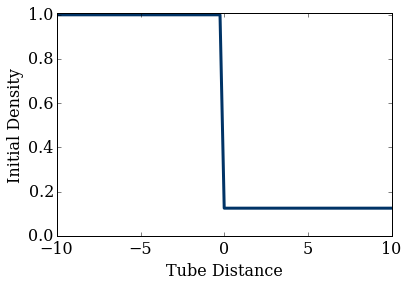

In [31]:
pyplot.plot(x, u[0,:], color='#003366', ls='-', lw=3)
pyplot.ylabel('Initial Density')
pyplot.xlabel('Tube Distance')
pyplot.ylim(0,1.01);

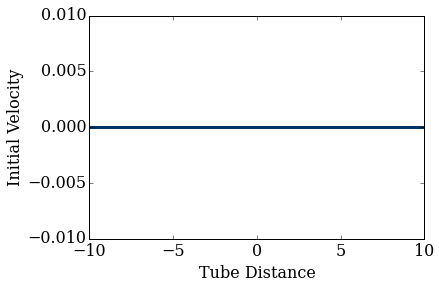

In [32]:
pyplot.plot(x, u[1,:]/u[0,:], color='#003366', ls='-', lw=3)
pyplot.ylabel('Initial Velocity')
pyplot.xlabel('Tube Distance')
pyplot.ylim(-.01,.01);

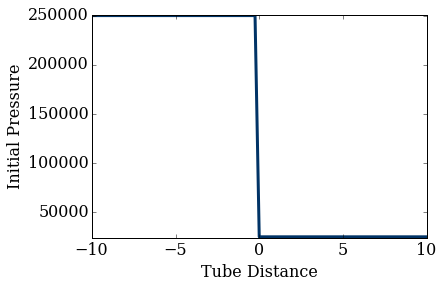

In [33]:
pyplot.plot(x, u[2,:], color='#003366', ls='-', lw=3)
pyplot.ylabel('Initial Pressure')
pyplot.xlabel('Tube Distance')
pyplot.ylim(24000,251000);

In [34]:
def computeF(u, gamma):
    F1 = u[1,:]
    F2 = (u[1,:]**2)/(u[0,:])+(gamma-1)*(u[2,:]-.5*((u[1,:])**2)/u[0,:])
    F3 = (u[2,:]+(gamma-1)*(u[2,:]-.5*((u[1,:])**2)/u[0,:]))*(u[1,:]/u[0,:])
    return numpy.array([F1, F2, F3])

In [35]:
def richtmeyer(u, nt, dt, dx, gamma):
    un = numpy.zeros((nt,3,nx))
    un[:] = u.copy()
    ustar = u.copy()
        
    for n in range(1,nt):
        F = computeF(u, gamma)
        
        ustar[:,:-1] = .5*(u[:,1:]+u[:,:-1])-(dt/(2*dx))*(F[:,1:]-F[:,:-1])
        
        Fstar = computeF(ustar, gamma)
        
        un[n,:,1:-1] = u[:,1:-1]-(dt/dx)*(Fstar[:,1:-1]-Fstar[:,:-2])
        
        u = un[n].copy()
        
    return un

In [36]:
out = richtmeyer(u, nt, dt, dx, gamma)
density = out[int(.01/dt),0,50]
velocity = out[int(.01/dt),1,50]/density
pressure = (gamma-1)*((out[int(.01/dt),2,50])-.5*(((out[int(.01/dt),1,50])**2)/density))

density, velocity, pressure

(0.3746914026476012, 292.61147152682651, 30250.89016757203)

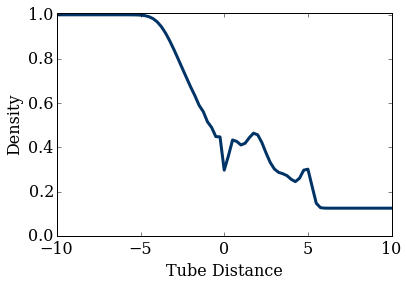

In [37]:
pyplot.plot(x, out[50,0,:], color='#003366', ls='-', lw=3)
pyplot.ylabel('Density')
pyplot.xlabel('Tube Distance')
pyplot.ylim(0,1.01);

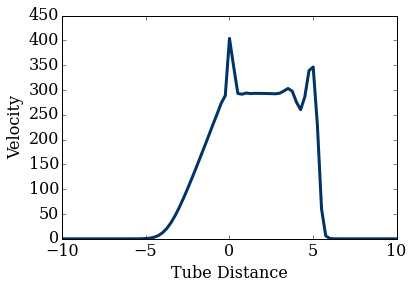

In [38]:
pyplot.plot(x, out[50,1,:]/out[50,0,:], color='#003366', ls='-', lw=3)
pyplot.ylabel('Velocity')
pyplot.xlabel('Tube Distance')
pyplot.ylim(0,450);

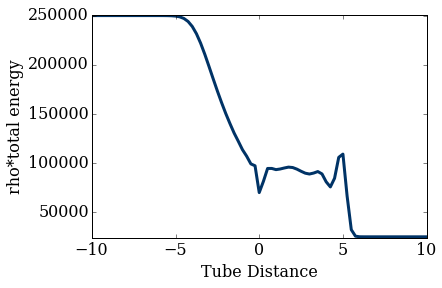

In [39]:
pyplot.plot(x, out[50,2,:], color='#003366', ls='-', lw=3)
pyplot.ylabel('rho*total energy')
pyplot.xlabel('Tube Distance')
pyplot.ylim(24000,251000);